In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dCV = pd.read_csv('full_data.csv').fillna(0)
dCV.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


In [160]:
dCV.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       "Cote d'Ivoire", 'Democratic Republic of Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia',
       'Faeroe Islands', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Georgia', 'Germany', 'Gibraltar', 'Greece',
       'Guernsey', 'Vatican', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'International', 'Iran', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kuwait', 'Latvia',
       'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Maldives', 'Malta', 'Martinique'

In [8]:
def groupby_column(df, column):
    gb_obj = df.groupby(column)
    gb_datadict = {key: gb_obj.get_group(key) for key in gb_obj.groups}
    return gb_datadict

def add_days(df_dict):
    days = []
    for key in df_dict.keys():
        df_dict[key]['day'] = [ i for i in range(1, df_dict[key].shape[0]+1)]   
        df_dict[key]['reverse_day'] = list(-1 *np.array(sorted([ i for i in range(1, df_dict[key].shape[0]+1)], reverse = True)))
    return df_dict

def add_log(df_dict, column):
    days = []
    for key in df_dict.keys():
        df_dict[key]['log_'+ str(column)] = np.log(abs(df_dict[key][column]))
    return df_dict


In [9]:
dCV_loc_dict = groupby_column(dCV, 'location')
print(dCV_loc_dict['Italy'].shape[0])
dCV_country = add_days(dCV_loc_dict)  
dCV_country['India'].head()

42


/home/rk19abb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/rk19abb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day
754,2020-01-30,India,0.0,0.0,1,0.0,1,-43
755,2020-01-31,India,0.0,0.0,1,0.0,2,-42
756,2020-02-01,India,0.0,0.0,1,0.0,3,-41
757,2020-02-02,India,1.0,0.0,2,0.0,4,-40
758,2020-02-03,India,1.0,0.0,3,0.0,5,-39


In [201]:
dCV_country['United Kingdom']

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,log_total_cases,log_day
1883,2020-02-01,United Kingdom,0.0,0.0,2,0.0,1,0.693147,0.000000
1884,2020-02-02,United Kingdom,0.0,0.0,2,0.0,2,0.693147,0.693147
1885,2020-02-03,United Kingdom,0.0,0.0,2,0.0,3,0.693147,1.098612
1886,2020-02-04,United Kingdom,0.0,0.0,2,0.0,4,0.693147,1.386294
1887,2020-02-05,United Kingdom,0.0,0.0,2,0.0,5,0.693147,1.609438
1888,2020-02-06,United Kingdom,0.0,0.0,2,0.0,6,0.693147,1.791759
1889,2020-02-07,United Kingdom,1.0,0.0,3,0.0,7,1.098612,1.945910
1890,2020-02-08,United Kingdom,0.0,0.0,3,0.0,8,1.098612,2.079442
1891,2020-02-09,United Kingdom,0.0,0.0,3,0.0,9,1.098612,2.197225
1892,2020-02-10,United Kingdom,1.0,0.0,4,0.0,10,1.386294,2.302585


In [10]:
dCV_country = add_log(dCV_country, 'total_cases')
dCV_country = add_log(dCV_country, 'day')
dCV_country['India'].head()

/home/rk19abb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
754,2020-01-30,India,0.0,0.0,1,0.0,1,-43,0.000000,0.000000
755,2020-01-31,India,0.0,0.0,1,0.0,2,-42,0.000000,0.693147
756,2020-02-01,India,0.0,0.0,1,0.0,3,-41,0.000000,1.098612
757,2020-02-02,India,1.0,0.0,2,0.0,4,-40,0.693147,1.386294
758,2020-02-03,India,1.0,0.0,3,0.0,5,-39,1.098612,1.609438


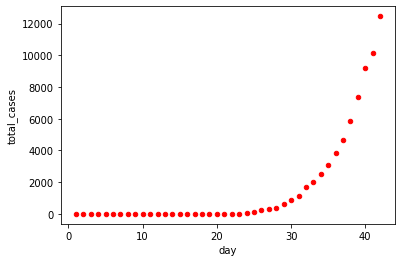

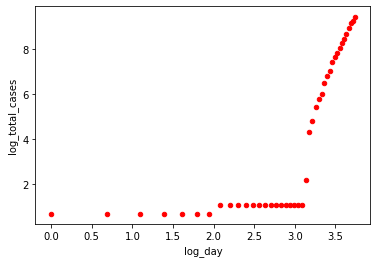

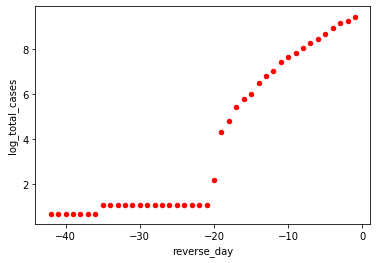

In [12]:
dCV_country['Italy'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCV_country['Italy'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCV_country['Italy'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')
plt.show()

In [35]:
def get_data_from_ndays(df_dict, ndays = 30):
    df_subdict = {}
    for key in df_dict.keys():
        df_subdict[key] = df_dict[key].loc[df_dict[key]['day']>=ndays]
    return df_subdict
dCVsub_country = get_data_from_ndays(dCV_country,30)
dCVsub_country['India']

,date,location,new_cases,new_deaths,total_cases,total_deaths,day,reverse_day,log_total_cases,log_day
783,2020-02-28,India,0.0,0.0,3,0.0,30,-14,1.098612,3.401197
784,2020-02-29,India,0.0,0.0,3,0.0,31,-13,1.098612,3.433987
785,2020-03-01,India,0.0,0.0,3,0.0,32,-12,1.098612,3.465736
786,2020-03-02,India,0.0,0.0,3,0.0,33,-11,1.098612,3.496508
787,2020-03-03,India,2.0,0.0,5,0.0,34,-10,1.609438,3.526361
788,2020-03-04,India,1.0,0.0,6,0.0,35,-9,1.791759,3.555348
789,2020-03-05,India,23.0,0.0,29,0.0,36,-8,3.367296,3.583519
790,2020-03-06,India,1.0,0.0,30,0.0,37,-7,3.401197,3.610918
791,2020-03-07,India,1.0,0.0,31,0.0,38,-6,3.433987,3.637586
792,2020-03-08,India,3.0,0.0,34,0.0,39,-5,3.526361,3.663562


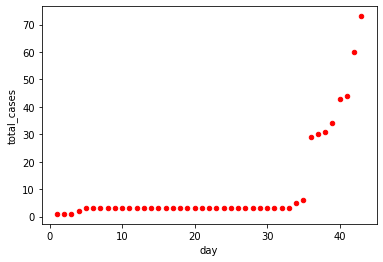

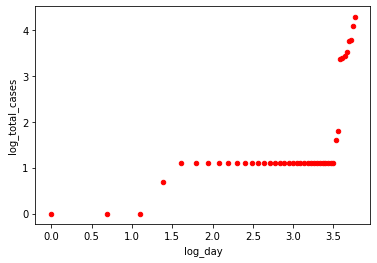

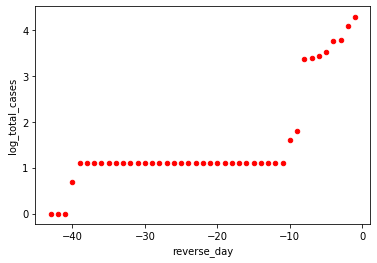

In [14]:
dCV_country['India'].plot(kind='scatter',x='day',y='total_cases',color='red')
plt.show()
dCV_country['India'].plot(kind='scatter',x='log_day',y='log_total_cases',color='red')
plt.show()
dCV_country['India'].plot(kind='scatter',x='reverse_day',y='log_total_cases',color='red')
plt.show()

In [205]:
from scipy import optimize

def piecewise_linear(x, x0, x1,x2, b1, b2, k0,k1, k2):
    condlist = [x < x0, (x >= x0) & (x < x1), (x >= x1) & (x < x2), (x >= x2)]
    funclist = [lambda x: b1, 
#                 lambda x: b1 + k0*(x-x0),
                lambda x: b1+ k0*(x-x0)+ k1*(x-x1),
#                 lambda x: b1 + b2 + k1*(x-x1),
                lambda x: b2,
#                 lambda x: b1 + b2 + k1*(x-x1) + k2*(x-x2)
                lambda x: b2+k2*(x-x2)
               ]
    return np.piecewise(x, condlist, funclist)

s = 'India'
x  = np.array(dCV_country[s]['log_day'])
y  = np.array(dCV_country[s]['log_total_cases'])
p, e = optimize.curve_fit(piecewise_linear, x, y)
p,e

/home/rk19abb/anaconda3/envs/enose/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


(array([1.00000000e+00, 1.00000000e+00, 3.45608440e+00, 1.79570459e-15,
        1.04674755e+00, 1.00000000e+00, 1.00000000e+00, 1.15336747e+01]),
 array([[inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf],
        [inf, inf, inf, inf, inf, inf, inf, inf]]))

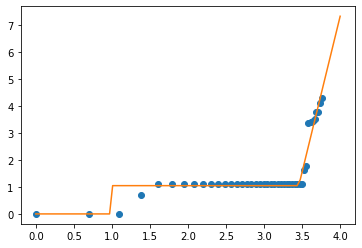

In [206]:
xd = np.linspace(0, 4, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

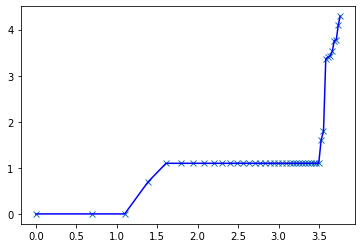

In [207]:
from scipy import interpolate
tck = interpolate.splrep(x, y, s=0)
ynew = interpolate.splev(x, tck, der=0)

plt.plot(x, y, 'x', x, ynew, 'b')

In [213]:
F = interpolate.PPoly.from_spline(tck)
F.x, F.c

(array([0.        , 0.        , 0.        , 0.        , 1.09861229,
        1.38629436, 1.60943791, 1.79175947, 1.94591015, 2.07944154,
        2.19722458, 2.30258509, 2.39789527, 2.48490665, 2.56494936,
        2.63905733, 2.7080502 , 2.77258872, 2.83321334, 2.89037176,
        2.94443898, 2.99573227, 3.04452244, 3.09104245, 3.13549422,
        3.17805383, 3.21887582, 3.25809654, 3.29583687, 3.33220451,
        3.36729583, 3.40119738, 3.4339872 , 3.4657359 , 3.49650756,
        3.52636052, 3.55534806, 3.58351894, 3.61091791, 3.63758616,
        3.66356165, 3.68887945, 3.71357207, 3.76120012, 3.76120012,
        3.76120012, 3.76120012]),
 array([[ 3.51439570e+00,  3.51439570e+00,  3.51439570e+00,
          3.51439570e+00, -8.17690173e+00, -7.31740211e+00,
          1.57299203e+01, -5.38198756e+00,  1.77902394e+00,
         -5.73015240e-01,  1.80875147e-01, -5.61772549e-02,
          1.72178511e-02, -5.21898771e-03,  1.56714363e-03,
         -4.66676910e-04,  1.37486961e-04, -3.81400474

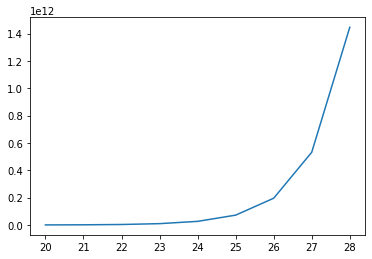

In [186]:
## model the rate of growth
from scipy.stats import powerlaw
import math
x  = range(20,29)
y = np.array(np.exp(x))
plt.plot(x,y)